In [39]:
import nltk
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import brown, treebank, conll2000
from textwrap import wrap
from nltk.probability import ConditionalFreqDist, ConditionalProbDist, FreqDist

In [3]:
nltk.download('brown')
nltk.download('treebank')
nltk.download('conll2000')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /home/halas/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package treebank to /home/halas/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package conll2000 to /home/halas/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/halas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/halas/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [5]:
def sent_accuracy(preds, labels):
    accuracies = []
    for i in range(len(preds)):
        actual = labels[i]
        acc = 0
        for j in range(len(preds[i])):
            if preds[i][j] == actual[j]:
                acc += 1
        if len(preds[i]) > 0:
            acc = acc / len(preds[i])
        accuracies.append(acc)
    return accuracies

In [28]:
pred_garden = []
with open('btrk/pred_garden.txt') as f:
    lines = f.readlines()
    s = []
    for line in lines:
        tokens = line.split()
        if len(tokens) != 0 and tokens[0] != ',':
            s.append(tokens)
        elif len(tokens) == 0:
            s.append(tokens)
        else:
            pred_garden.append(s)
            s = []

actual_garden = []
with open('data/labels_garden.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        actual_garden.append(tokens)
        
garden_accs = [sent_accuracy(supr, actual_garden) for supr in pred_garden]
mean_garden_accs = [np.mean(lst) for lst in garden_accs]
mean_garden_accs

[0.378042328042328,
 0.378042328042328,
 0.5151171579743009,
 0.5916477702191989,
 0.5916477702191989,
 0.5916477702191989,
 0.5916477702191989,
 0.5916477702191989,
 0.5976001511715798,
 0.6044028722600152,
 0.6044028722600152,
 0.6091647770219198,
 0.6091647770219198,
 0.6091647770219198]

In [29]:
pred_normal = []
with open('btrk/pred_normal.txt') as f:
    lines = f.readlines()
    s = []
    for line in lines:
        tokens = line.split()
        if len(tokens) != 0 and tokens[0] != ',':
            s.append(tokens)
        elif len(tokens) == 0:
            s.append(tokens)
        else:
            pred_normal.append(s)
            s = []
    
actual_normal = []
with open('data/labels_normal.txt') as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.split()
        actual_normal.append(tokens)

normal_accs = [sent_accuracy(supr, actual_normal) for supr in pred_normal]
mean_normal_accs = [np.mean(lst) for lst in normal_accs]
mean_normal_accs

[0.4410430839002268,
 0.4410430839002268,
 0.621504157218443,
 0.7107898715041573,
 0.7107898715041573,
 0.7107898715041573,
 0.7107898715041573,
 0.7107898715041573,
 0.7175925925925926,
 0.7243953136810279,
 0.7243953136810279,
 0.7243953136810279,
 0.7243953136810279,
 0.7311980347694634]

Text(0.5, 1.0, 'Mean accuracy of POS predictions across normal and garden-\npath sentences for different suprisals')

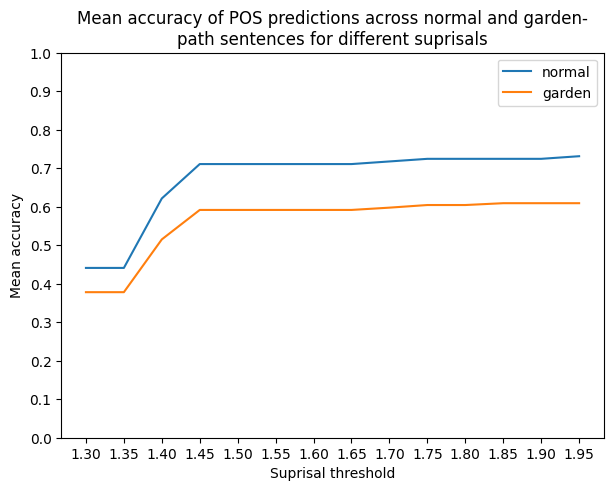

In [79]:
# Plot normal against garden path
fig = plt.figure(figsize=(7, 5))
supr_range = np.arange(1.3, 2, 0.05)
plt.plot(supr_range, mean_normal_accs, label='normal')
plt.plot(supr_range, mean_garden_accs, label='garden')
plt.xticks(supr_range)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.xlabel("Suprisal threshold")
plt.ylabel("Mean accuracy")
plt.title('\n'.join(
    wrap("Mean accuracy of POS predictions across normal and garden-path sentences for different suprisals", 60)))

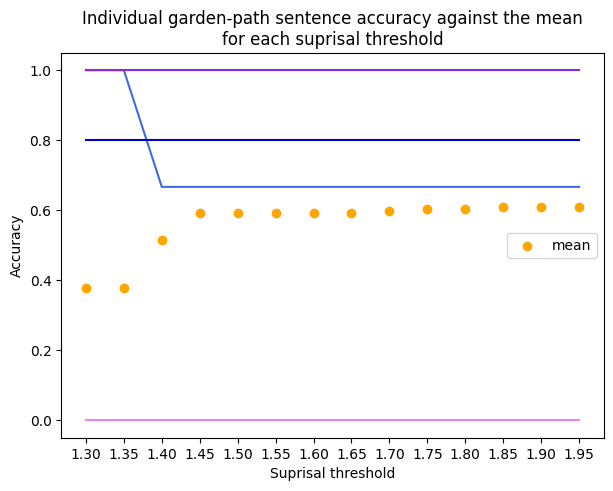

In [75]:
# Plot individual accuracy values against mean accuracy
fig = plt.figure(figsize=(7,5))
t = np.arange(12)
colors = ['royalblue', 'mediumblue', 'blueviolet',
          'violet', 'purple', 'mediumvioletred', 'deeppink']

garden_sent_accs = [[] for i in range(21)]
for acc in garden_accs:
    for i in range(21):
        garden_sent_accs[i].append(acc[i])

chosen_garden = [garden_sent_accs[i] for i in [0, 1, 12, 18]]
for i in range(len(chosen_garden)):
    plt.plot(supr_range, chosen_garden[i], color=colors[i])
# Plot means

plt.scatter(supr_range, mean_garden_accs, color='orange', label='mean')
plt.xticks(supr_range)
plt.xlabel("Suprisal threshold")
plt.ylabel("Accuracy")
plt.title('\n'.join(
    wrap("Individual garden-path sentence accuracy against the mean for each suprisal threshold", 60)))
plt.legend()

In [ ]:
# set range for the surprisal values allowed
# find the value that generates minimal error (grid/line search)
# use normalized suprisal / div by number of elements